In [169]:
from copulae1 import *
from arch import arch_model

data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
data= data.iloc[::-1].reset_index(drop=True)
brr = data.iloc[:,4]
btc = data.iloc[:,5]

u = ECDF(brr)(brr)
v = ECDF(btc)(btc)

In [257]:
am = arch_model(brr*10, vol='Garch', p=1, o=0, q=1, dist='t')
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 288.23321908199193
Iteration:      2,   Func. Count:     18,   Neg. LLF: 288.1192188598347
Iteration:      3,   Func. Count:     27,   Neg. LLF: 283.0565689014149
Iteration:      4,   Func. Count:     35,   Neg. LLF: 281.46121729872584
Iteration:      5,   Func. Count:     43,   Neg. LLF: 279.16795023497457
Iteration:      6,   Func. Count:     51,   Neg. LLF: 276.8809543174755
Iteration:      7,   Func. Count:     59,   Neg. LLF: 274.75857128352396
Iteration:      8,   Func. Count:     67,   Neg. LLF: 273.0981242991386
Iteration:      9,   Func. Count:     75,   Neg. LLF: 271.4680010945601
Iteration:     10,   Func. Count:     83,   Neg. LLF: 270.5158539578801
Iteration:     11,   Func. Count:     91,   Neg. LLF: 269.42167746803403
Iteration:     12,   Func. Count:     98,   Neg. LLF: 267.71707812518406
Iteration:     13,   Func. Count:    106,   Neg. LLF: 266.8748563221379
Iteration:     14,   Func. Count:    115,   Neg. LLF: 266.

In [216]:
res.params

mu          0.015477
omega       0.007369
alpha[1]    0.126784
beta[1]     0.873216
nu          2.732413
Name: params, dtype: float64

\begin{align}
r_t &= \mu + \epsilon_t \\ 
\sigma^2_t &= \omega + \alpha\epsilon^2_{t-1}+\beta \sigma^2_{t-1}\\
\epsilon_t &= \sigma_t e_t, e_t \sim T_\nu
\end{align}

In [261]:
mu = res.params['mu']
omega = res.params['omega']
alpha = res.params['alpha[1]']
beta = res.params['beta[1]']
nu = res.params['nu']
# _lambda = res.params['lambda']

In [262]:
T = stats.t(df=nu)

In [263]:
sample_size = 100
epsilon = np.zeros(sample_size+1)
# epsilon[0] = brr.iloc[-1] - mu
epsilon[0] = 0

In [264]:
sigma = np.ones(sample_size+1)
sigma[0] = 0#np.sqrt((res.forecast().variance.iloc[-1] - omega - alpha*epsilon[0]**2)/beta)

In [265]:
for i in range(1,sample_size+1):
    sigma[i] = np.sqrt(omega + alpha*epsilon[i-1]**2 + beta*sigma[i-1]**2)
    e = T.rvs(size=1)[0]
    epsilon[i] = sigma[i]*e

In [266]:
r = epsilon[1:]+mu


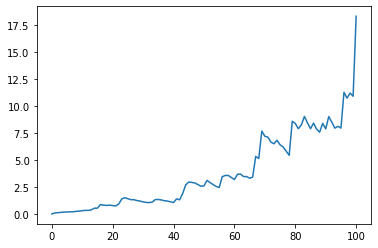

In [267]:
plt.plot(sigma)

In [212]:
am = arch_model(r, vol='Garch', p=1, o=0, q=1, dist='t')
res = am.fit()
res.params

Iteration:      1,   Func. Count:      7,   Neg. LLF: 502.56142970746225
Iteration:      2,   Func. Count:     15,   Neg. LLF: 501.3756466563447
Iteration:      3,   Func. Count:     22,   Neg. LLF: 499.30898420691045
Iteration:      4,   Func. Count:     30,   Neg. LLF: 498.85421976700957
Iteration:      5,   Func. Count:     38,   Neg. LLF: 498.5004066933908
Iteration:      6,   Func. Count:     46,   Neg. LLF: 498.21862734090126
Iteration:      7,   Func. Count:     54,   Neg. LLF: 497.99423679258507
Iteration:      8,   Func. Count:     62,   Neg. LLF: 497.81967477467106
Iteration:      9,   Func. Count:     70,   Neg. LLF: 497.64688775764756
Iteration:     10,   Func. Count:     77,   Neg. LLF: 497.58676595300255
Iteration:     11,   Func. Count:     84,   Neg. LLF: 497.4996722025746
Iteration:     12,   Func. Count:     91,   Neg. LLF: 497.4900825912527
Iteration:     13,   Func. Count:     98,   Neg. LLF: 497.47724020494206
Iteration:     14,   Func. Count:    105,   Neg. LLF: 4

mu         -0.297392
omega       2.953150
alpha[1]    0.302429
beta[1]     0.697571
nu          4.152560
Name: params, dtype: float64

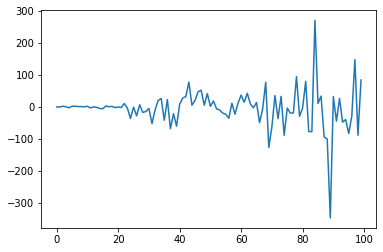

In [213]:
plt.plot(r)

In [310]:
sigma = [0]
epsilon = [0]
for i in range(1,1000):
    _sigma = np.sqrt(omega+alpha*epsilon[i-1]**2 + beta*sigma[i-1]**2)
    sigma.append(_sigma)
    e = T.rvs(size=1)[0]
    epsilon.append(sigma[i]**2*e) 

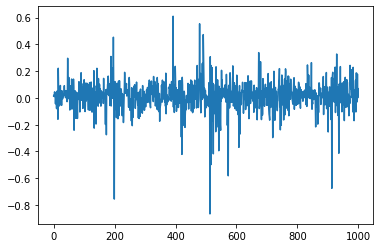

In [313]:
s = np.array(epsilon)+mu
plt.plot(s)